In [40]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)
import numpy as np
import matplotlib.pyplot as plt
import math

def load_velocity_data(filename):
    """
    Load velocity data from a file.
    Assumes the file has 5 columns: i, j, density, velocity_x, velocity_y.
    
    Returns:
        X, Y : 2D arrays for grid coordinates
        Vx, Vy : 2D arrays for the velocity components
    """
    data = np.loadtxt(filename)
    # Extract grid indices and velocity components
    i_coords = data[:, 0].astype(int)
    j_coords = data[:, 1].astype(int)
    velocity_x = data[:, 3]
    velocity_y = data[:, 4]
    
    # Determine grid dimensions (assuming i and j start at 0)
    nx = i_coords.max() + 1
    ny = j_coords.max() + 1
    
    # Initialize arrays to hold velocity data
    Vx = np.zeros((ny, nx))
    Vy = np.zeros((ny, nx))
    
    # Fill the arrays
    for i, j, vx, vy in zip(i_coords, j_coords, velocity_x, velocity_y):
        Vx[j, i] = vx
        Vy[j, i] = vy
    
    # Create a meshgrid for plotting
    X, Y = np.meshgrid(np.arange(nx), np.arange(ny))
    return X, Y, Vx, Vy

# File corresponding to time=100
filename = "active_nematic_velocity_1000.dat"
X, Y, Vx, Vy = load_velocity_data(filename)

# Check the velocity magnitude to decide on scaling
magnitude = np.sqrt(Vx**2 + Vy**2)
print("Velocity magnitude: min =", magnitude.min(), ", max =", magnitude.max())

# If velocities are very small, scale them up for visualization.
scale_factor = 10  # adjust this factor as needed
Vx_scaled = Vx * scale_factor
Vy_scaled = Vy * scale_factor

plt.figure(figsize=(4,3))
# # Plot the magnitude as a filled contour (optional)
# contour = plt.contourf(X, Y, magnitude, levels=20, cmap='viridis', alpha=0.5)
# plt.colorbar(contour, label='Velocity magnitude')

# Create a quiver plot with one arrow per grid cell.
# Using angles='xy', scale_units='xy', and scale=1 ensures that the arrow lengths
# are determined solely by the data (after scaling) without automatic shrinking.
plt.quiver(X, Y, Vx, Vy, magnitude, color='k', cmap='bwr')
plt.colorbar()
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Velocity Field at time = 0")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()


Velocity magnitude: min = 0.09751730087045624 , max = 0.2031150322604403


Velocity magnitude: min = 0.17320508075688776 , max = 0.17320508075688776


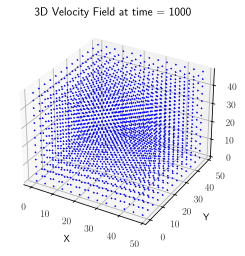

In [60]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D  # for 3d plotting

def load_velocity_data_3d(filename, skip=4):
    """
    Load 3D velocity data from a file.
    Assumes the file has 7 columns: i, j, k, density, velocity_x, velocity_y, velocity_z.
    
    Returns:
        X, Y, Z : 3D arrays for grid coordinates (subsampled by 'skip')
        Vx, Vy, Vz : 3D arrays for the velocity components (subsampled)
    """
    data = np.loadtxt(filename)
    # Extract grid indices and velocity components
    i_coords = data[:, 0].astype(int)
    j_coords = data[:, 1].astype(int)
    k_coords = data[:, 2].astype(int)
    velocity_x = data[:, 4]
    velocity_y = data[:, 5]
    velocity_z = data[:, 6]
    
    # Determine grid dimensions (assuming indices start at 0)
    nx = i_coords.max() + 1
    ny = j_coords.max() + 1
    nz = k_coords.max() + 1

    # Initialize arrays for the velocity components.
    # Here we assume the grid is structured so that the i-index corresponds to x, j to y, and k to z.
    Vx = np.zeros((nx, ny, nz))
    Vy = np.zeros((nx, ny, nz))
    Vz = np.zeros((nx, ny, nz))
    
    # Fill the arrays (note: if you prefer the y–direction to be the row index in plots,
    # you can swap the ordering accordingly)
    for i, j, k, vx, vy, vz in zip(i_coords, j_coords, k_coords, velocity_x, velocity_y, velocity_z):
        Vx[i, j, k] = vx
        Vy[i, j, k] = vy
        Vz[i, j, k] = vz

    # Create a meshgrid for the grid coordinates
    x = np.arange(nx)
    y = np.arange(ny)
    z = np.arange(nz)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    
    # Subsample the data for visualization
    return (X[::skip, ::skip, ::skip], 
            Y[::skip, ::skip, ::skip], 
            Z[::skip, ::skip, ::skip], 
            Vx[::skip, ::skip, ::skip], 
            Vy[::skip, ::skip, ::skip], 
            Vz[::skip, ::skip, ::skip])

# File corresponding to a given time (e.g. time = 1000)
filename = "active_nematic_3d_velocity_0.dat"
X, Y, Z, Vx, Vy, Vz = load_velocity_data_3d(filename)

# Compute velocity magnitude
magnitude = np.sqrt(Vx**2 + Vy**2 + Vz**2)
print("Velocity magnitude: min =", magnitude.min(), ", max =", magnitude.max())

# Optionally, scale the velocities if they are very small.
scale_factor = 1  # adjust as needed
Vx_scaled = Vx * scale_factor
Vy_scaled = Vy * scale_factor
Vz_scaled = Vz * scale_factor

# Create a 3D quiver plot
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')

# Matplotlib's 3D quiver does not support colormapping the arrows easily,
# so here we use a uniform color (you may choose to further customize if needed).
q = ax.quiver(X, Y, Z, Vx_scaled, Vy_scaled, Vz_scaled, length=0.5, normalize=True, color='b')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Velocity Field at time = 1000")
plt.show()

In [58]:
import numpy as np

filename = "active_nematic_3d_velocity_1000.dat"
data = np.loadtxt(filename)
print("Data shape:", data.shape)
ncols = data.shape[1]
print("Number of columns:", ncols)

if ncols == 5:
    print("This is 2D data.")
elif ncols == 7:
    print("This is 3D data.")
else:
    print("Unexpected number of columns; please check your file format.")


Data shape: (125000, 7)
Number of columns: 7
This is 3D data.
